In [1]:
ls

SIDO_MAP_2022.json
fire.ipynb
fire_transposed.csv
rain.ipynb
shelter.ipynb
서울시 이재민임시주거시설.csv
서울시_강우량_정보_2022년07월.csv
서울시_강우량_정보_2022년08월.csv
서울시_강우량_정보_2022년09월.csv
화재발생+현황_20230308132332.csv


In [2]:
import pandas as pd

In [3]:
df =pd.read_csv('서울시 이재민임시주거시설.csv',encoding='euc-kr')#

In [5]:
print(df.shape)
# df

(1172, 20)


In [6]:
df.head()

시설번호        지역코드  시설일련번호    시도명 시군구명  시설구분코드 시설구분       수용시설명  \
0  7176  1150000000     372  서울특별시  강서구       3  경로당      원당 경로당   
1  7177  1150000000     408  서울특별시  강서구       3  경로당      신광명경로당   
2  7178  1150000000     426  서울특별시  강서구       1   학교  송정초등학교 체육관   
3  7179  1150000000     427  서울특별시  강서구       1   학교       송정중학교   
4  7180  1150000000     376  서울특별시  강서구       3  경로당     산우물 경로당   

                     도로명주소코드         법정동코드       행정동코드  \
0  1150010600106500000008335  1.150011e+09  1150061500   
1  1150010700102210001009151  1.150011e+09  1150061100   
2  1150010800100220169005513  1.150011e+09  1150062000   
3  1150010800107680001007651  1.150011e+09  1150062000   
4  1150010800100020091007853  1.150011e+09  1150062000   

                           상세주소  시설면적  이재민수용능력 관리부서      지자체담당자연락처  \
0     서울특별시 강서구 강서로52길 72(내발산동)    96       36  나강하  010-6690-3044   
1  서울특별시 강서구 남부순환로19길 105(외발산동)   260      100  송병근  010-5235-8383   
2      서울특별시 강서구 공항대로3길 18(공항동)   618      237  임선미  010-8532-1104   
3      서울특별시 강서구 남부순환로 121(공항동)   869      334  조방희  010-2644-4571   
4    서울특별시 강서구 방화대로21가길 18(공항동)   167       64  김명연  010-5575-9926   

           경도         위도            X좌표            Y좌표  
0  126.842141  37.557270  186051.949904  550872.043067  
1  126.823064  37.546780  184364.094665  549710.872556  
2  126.810892  37.562181  183291.909546  551422.258280  
3  126.815248  37.553596  183674.898825  550468.658457  
4  126.814674  37.563764  183626.379243  551597.290638

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172 entries, 0 to 1171
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   시설번호       1172 non-null   int64  
 1   지역코드       1172 non-null   int64  
 2   시설일련번호     1172 non-null   int64  
 3   시도명        1172 non-null   object 
 4   시군구명       1172 non-null   object 
 5   시설구분코드     1172 non-null   int64  
 6   시설구분       1172 non-null   object 
 7   수용시설명      1172 non-null   object 
 8   도로명주소코드    1170 non-null   object 
 9   법정동코드      1171 non-null   float64
 10  행정동코드      1172 non-null   int64  
 11  상세주소       1172 non-null   object 
 12  시설면적       1172 non-null   int64  
 13  이재민수용능력    1172 non-null   int64  
 14  관리부서       855 non-null    object 
 15  지자체담당자연락처  658 non-null    object 
 16  경도         1172 non-null   float64
 17  위도         1172 non-null   float64
 18  X좌표        1172 non-null   float64
 19  Y좌표        1172 non-null   float64
dtypes: float

In [55]:
null_count = df.isnull().sum()
null_count


시설번호           0
지역코드           0
시설일련번호         0
시도명            0
시군구명           0
시설구분코드         0
시설구분           0
수용시설명          0
도로명주소코드        2
법정동코드          1
행정동코드          0
상세주소           0
시설면적           0
이재민수용능력        0
관리부서         317
지자체담당자연락처    514
경도             0
위도             0
X좌표            0
Y좌표            0
dtype: int64

In [56]:
#series 를 dataframe 으로 변환
df_null_count = null_count.reset_index()
df_null_count.head()

index  0
0    시설번호  0
1    지역코드  0
2  시설일련번호  0
3     시도명  0
4    시군구명  0

In [57]:
#컬럼명 변경(index, 0 => 컬럼명, 결측치수
df_null_count.columns=["컬럼명","결측치수"]
df_null_count

컬럼명  결측치수
0        시설번호     0
1        지역코드     0
2      시설일련번호     0
3         시도명     0
4        시군구명     0
5      시설구분코드     0
6        시설구분     0
7       수용시설명     0
8     도로명주소코드     2
9       법정동코드     1
10      행정동코드     0
11       상세주소     0
12       시설면적     0
13    이재민수용능력     0
14       관리부서   317
15  지자체담당자연락처   514
16         경도     0
17         위도     0
18        X좌표     0
19        Y좌표     0

In [58]:
#df 에서 결측치가 많은 것을 df 형식으로 가져옴, ascending = False 내림차순
df_null_count_top5= df_null_count.sort_values(by ='결측치수', ascending= False).head(5)
df_null_count_top5


컬럼명  결측치수
15  지자체담당자연락처   514
14       관리부서   317
8     도로명주소코드     2
9       법정동코드     1
0        시설번호     0

In [59]:
#해당 컬럼명만 series로 가져옴
drop_columns = df_null_count_top5['컬럼명']
drop_columns

15    지자체담당자연락처
14         관리부서
8       도로명주소코드
9         법정동코드
0          시설번호
Name: 컬럼명, dtype: object

In [61]:
drop_columns_list =drop_columns.tolist()
drop_columns_list

['지자체담당자연락처', '관리부서', '도로명주소코드', '법정동코드', '시설번호']

In [62]:
#행(row)를 제거할 경우엔 'axis = 0'으로, 열(column)을 제거할 경우엔 'axis = 1'로 설정해주어야 한다
print(df.shape)
df_drop = df.drop(drop_columns, axis=1)
print(df_drop.shape)


(1172, 20)
(1172, 15)


In [63]:
df_drop = df.drop(drop_columns_list, axis=1)
print(df_drop.shape)

(1172, 15)


In [42]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172 entries, 0 to 1171
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역코드     1172 non-null   int64  
 1   시설일련번호   1172 non-null   int64  
 2   시도명      1172 non-null   object 
 3   시군구명     1172 non-null   object 
 4   시설구분코드   1172 non-null   int64  
 5   시설구분     1172 non-null   object 
 6   수용시설명    1172 non-null   object 
 7   행정동코드    1172 non-null   int64  
 8   상세주소     1172 non-null   object 
 9   시설면적     1172 non-null   int64  
 10  이재민수용능력  1172 non-null   int64  
 11  경도       1172 non-null   float64
 12  위도       1172 non-null   float64
 13  X좌표      1172 non-null   float64
 14  Y좌표      1172 non-null   float64
dtypes: float64(4), int64(6), object(5)
memory usage: 137.5+ KB


In [64]:
df_drop.isnull().sum()

지역코드       0
시설일련번호     0
시도명        0
시군구명       0
시설구분코드     0
시설구분       0
수용시설명      0
행정동코드      0
상세주소       0
시설면적       0
이재민수용능력    0
경도         0
위도         0
X좌표        0
Y좌표        0
dtype: int64

In [65]:
df.columns


Index(['시설번호', '지역코드', '시설일련번호', '시도명', '시군구명', '시설구분코드', '시설구분', '수용시설명',
       '도로명주소코드', '법정동코드', '행정동코드', '상세주소', '시설면적', '이재민수용능력', '관리부서',
       '지자체담당자연락처', '경도', '위도', 'X좌표', 'Y좌표'],
      dtype='object')

In [66]:
len(sorted(list(set(df_drop['시군구명']))))

25

In [76]:
# df_drop.groupby(['시군구명']).mean()
# df[df["시군구명"] == "강남구"]
print(df[df["시군구명"] == "강남구"])

     시설번호        지역코드  시설일련번호    시도명 시군구명  시설구분코드 시설구분            수용시설명  \
234  9131  1168000000     532  서울특별시  강남구       1   학교           대도초등학교   
235  9132  1168000000     531  서울특별시  강남구       1   학교            대치중학교   
236  9133  1168000000     542  서울특별시  강남구       4  관공서          도곡1문화센터   
255  9152  1168000000      15  서울특별시  강남구       1   학교           도성초등학교   
256  9153  1168000000     530  서울특별시  강남구       1   학교            역삼중학교   
257  9154  1168000000     529  서울특별시  강남구       4  관공서          역삼1문화센터   
258  9155  1168000000      21  서울특별시  강남구       1   학교           포이초등학교   
261  9158  1168000000     524  서울특별시  강남구       1   학교            청담중학교   
262  9159  1168000000     526  서울특별시  강남구       1   학교           경기고등학교   
263  9160  1168000000     525  서울특별시  강남구       1   학교           봉은초등학교   
279  9107  1168000000      25  서울특별시  강남구       1   학교           대진초등학교   
280  9108  1168000000     536  서울특별시  강남구       1   학교           구룡초등학교   
281  9109  1168000000    

In [3]:
!pip3 install folium
!pip3 install geopy
!pip3 install pandas



Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.0/123.0 kB 4.4 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.5 MB/s eta 0:00:00
Defaulting to user installation because normal site-packages is not writeable


In [5]:
import folium
from geopy.geocoders import Nominatim
import pandas as pd


In [6]:
import folium

# 서울시 위도, 경도
latitude = 37.5665
longitude = 126.9780

# 지도 생성하기
seoul_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# 지도 출력하기
seoul_map


In [7]:
# 서울 시청 위치
seoul_cityhall = [37.5662891, 126.9779429]

# 마커 추가하기
folium.Marker(location=seoul_cityhall, popup='서울시청').add_to(seoul_map)

# 지도 출력하기
seoul_map


In [10]:
import folium
import pandas as pd

# 서울시 데이터
df = pd.read_csv('서울시 이재민임시주거시설.csv',encoding='euc-kr')

# 지도 중심 위치 설정하기
latitude = df['위도'].mean()
longitude = df['경도'].mean()

# 지도 생성하기
shelter_map = folium.Map(location=[latitude, longitude], zoom_start=14)

#위치 추가하기
for index, row in df.iterrows():
    folium.Marker(location=[row['위도'], row['경도']],
                  popup=row['수용시설명'],
                  icon=folium.Icon(color='blue')).add_to(shelter_map)

# 지도 출력하기
shelter_map


In [27]:
import folium
import pandas as pd
# 지도 생성하기
shelter_heatmap = folium.Map(location=[latitude, longitude], zoom_start=14)

# 데이터의 평균 위도와 경도 구하기
latitude = df['위도'].mean()
longitude = df['경도'].mean()

# 열 지도 추가하기
heat_data = [[row['위도'], row['경도']] for index, row in df.iterrows()]
folium.plugins.HeatMap(heat_data).add_to(shelter_heatmap)

# 지도 출력하기
shelter_heatmap

In [28]:
import folium
import pandas as pd
import folium
from folium import plugins
# 데이터 불러오기
df = pd.read_csv('서울시 이재민임시주거시설.csv', encoding='euc-kr')

# 지도 생성하기
shelter_heatmap = folium.Map(location=[latitude, longitude], zoom_start=11)

# 열 지도 추가하기
heat_data = [[row['위도'], row['경도']] for index, row in df.iterrows()]
fg = folium.FeatureGroup(name='Heat Map', show=True, overlay=True)
fg.add_to(shelter_heatmap)
folium.plugins.HeatMap(heat_data).add_to(fg)

# 시도 경계 정보 추가하기
geo_json = 'SIDO_MAP_2022.json'
folium.GeoJson(
    geo_json,
    name='Province Border',
    style_function=lambda feature: {
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0,
    }
).add_to(shelter_heatmap)

# 지도 출력하기
folium.LayerControl().add_to(shelter_heatmap)
shelter_heatmap


In [18]:
ls


SIDO_MAP_2022.json
project_test.ipynb
서울시 공동체주택 공간예약 정보.csv
서울시 이재민임시주거시설.csv
자전거도로+현황(2013년+이후)_20230306140146.csv


In [29]:
import folium
import pandas as pd

# 서울시 데이터
df = pd.read_csv('서울시 이재민임시주거시설.csv', encoding='euc-kr')

# 지도 중심 위치 설정하기
latitude = df['위도'].mean()
longitude = df['경도'].mean()

# 지도 생성하기
shelter_map = folium.Map(location=[latitude, longitude], zoom_start=14)

# 위치 추가하기
for index, row in df.iterrows():
    folium.CircleMarker(location=[row['위도'], row['경도']],
                        radius=5,
                        color='blue',
                        fill_color='blue',
                        popup=row['수용시설명']).add_to(shelter_map)

# 지도 출력하기
shelter_map


In [34]:
import folium
import pandas as pd

# 서울시 데이터
df = pd.read_csv('서울시 이재민임시주거시설.csv',encoding='euc-kr')

# 지도 중심 위치 설정하기
latitude = df['위도'].mean()
longitude = df['경도'].mean()

# 지도 생성하기
shelter_map = folium.Map(location=[latitude, longitude], zoom_start=14, tiles='Stamen Toner')

#위치 추가하기
for index, row in df.iterrows():
    folium.Marker(location=[row['위도'], row['경도']],
                  popup=f"<b>{row['수용시설명']}</b><br>{row['상세주소']}<br>시설구분코드: {row['시설구분코드']}",
                  icon=folium.Icon(color='green', prefix='fa', icon='home')).add_to(shelter_map)

# 지도 스타일 추가하기
folium.TileLayer('Stamen Terrain').add_to(shelter_map)
folium.TileLayer('Stamen Toner Labels').add_to(shelter_map)
folium.LayerControl().add_to(shelter_map)

# 지도 출력하기
shelter_map


In [38]:
import folium
import pandas as pd
import requests

# 서울시 데이터
df = pd.read_csv('서울시 이재민임시주거시설.csv', encoding='euc-kr')

# 서울시 구별 경계 데이터
url = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
geo_data = requests.get(url).json()

# 지도 중심 위치 설정하기
latitude = df['위도'].mean()
longitude = df['경도'].mean()

# 지도 생성하기
shelter_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# 지역 경계 추가하기
folium.GeoJson(
    geo_data,
    name='seoul_municipalities',
    style_function=lambda x: {
        'color': 'black',
        'weight': 2,
        'fillColor': 'green',
        'fillOpacity': 0.2,
    },
    highlight_function=lambda x: {
        'weight': 3,
        'fillOpacity': 0.7,
    }
).add_to(shelter_map)

#위치 추가하기
for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=5,
        popup=row['수용시설명'],
        color='#3186cc',
        fill=True,
        fill_color='#3186cc'
    ).add_to(shelter_map)

# 지도 출력하기
shelter_map


In [44]:
# 서울시 구별 경계 데이터
url = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
geo_data = requests.get(url).json()

# 지도 중심 위치 설정하기
latitude = df['위도'].mean()
longitude = df['경도'].mean()

# 지도 생성하기
shelter_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# choropleth map 추가하기
folium.Choropleth(
    geo_data=geo_data,
    name='choropleth',
    data=df,
    columns=['시군구명', '이재민수용능력'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='이재민수용능력',
    highlight=True,
).add_to(shelter_map)

# 위치 추가하기
for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=5,
        popup=row['수용시설명'],
        color='#3186cc',
        fill=True,
        fill_color='#3186cc'
    ).add_to(shelter_map)

# 지도 출력하기
shelter_map

In [6]:
df_count = df.groupby('시군구명')['수용시설명'].count().reset_index(name='수용시설개수')
df_count

시군구명  수용시설개수
0    강남구      35
1    강동구      50
2    강북구      32
3    강서구      87
4    관악구      41
5    광진구      52
6    구로구      46
7    금천구      45
8    노원구      27
9    도봉구      30
10  동대문구      39
11   동작구      34
12   마포구      65
13  서대문구      36
14   서초구      67
15   성동구      26
16   성북구      41
17   송파구      43
18   양천구      84
19  영등포구      77
20   용산구      41
21   은평구      37
22   종로구      52
23    중구      37
24   중랑구      48

In [53]:
import folium
import pandas as pd
import requests
import json

# 서울시 데이터
df = pd.read_csv('서울시 이재민임시주거시설.csv', encoding='euc-kr')

# 서울시 구별 경계 데이터
url = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
geo_data = requests.get(url).json()

# 구별 수용시설 개수 세기
df_count = df.groupby('시군구명')['수용시설명'].count().reset_index(name='수용시설개수')

# 지도 중심 위치 설정하기
latitude = df['위도'].mean()
longitude = df['경도'].mean()

# 지도 생성하기
shelter_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# choropleth map 추가하기
folium.Choropleth(
    geo_data=geo_data,
    name='choropleth',
    data=df_count,
    columns=['시군구명', '수용시설개수'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='수용시설개수',
    highlight=True,
).add_to(shelter_map)

# # 위치 추가하기
# for index, row in df.iterrows():
#     folium.CircleMarker(
#         location=[row['위도'], row['경도']],
#         radius=5,
#         popup=row['수용시설명'],
#         color='#3186cc',
#         fill=True,
#         fill_color='#3186cc'
#         ).add_to(shelter_map)

# 지도 출력하기
shelter_map


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 11.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 11.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.0 MB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


/Users/ddudeong/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ddudeong/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ddudeong/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48124 (\N{HANGUL SYLLABLE MIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ddudeong/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ddudeong/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing fro

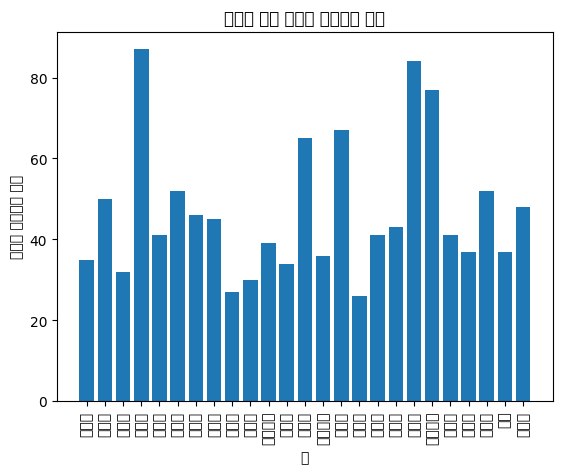

In [55]:
!pip3 install matplotlib



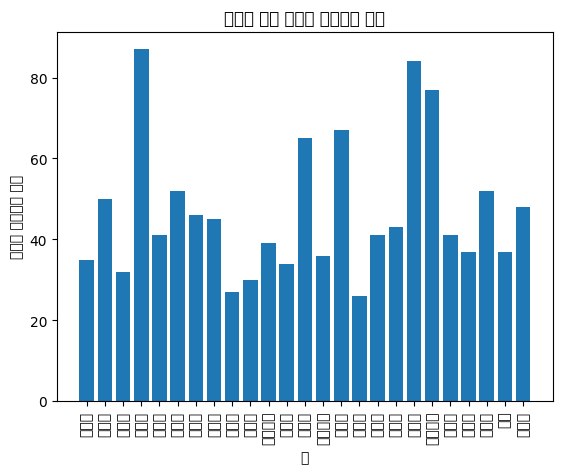

In [59]:
import matplotlib.pyplot as plt

# 막대 그래프 그리기
plt.bar(df_count['시군구명'], df_count['수용시설개수'])
plt.xticks(rotation=90)
plt.title('서울시 구별 이재민 수용시설 개수')
plt.xlabel('구')
plt.ylabel('이재민 수용시설 개수')
plt.show()


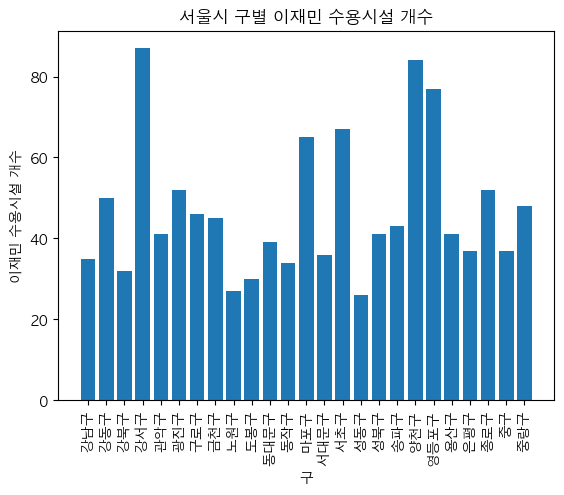

In [11]:

# 폰트 설정
import matplotlib.pyplot as plt
from matplotlib import rc  ### 이 줄과
rc('font', family='AppleGothic') ## 이 두 줄을 추가
plt.rcParams['axes.unicode_minus'] = False  

# 막대 그래프 그리기
plt.bar(df_count['시군구명'], df_count['수용시설개수'])
plt.xticks(rotation=90)
plt.title('서울시 구별 이재민 수용시설 개수')
plt.xlabel('구')
plt.ylabel('이재민 수용시설 개수')
plt.show()


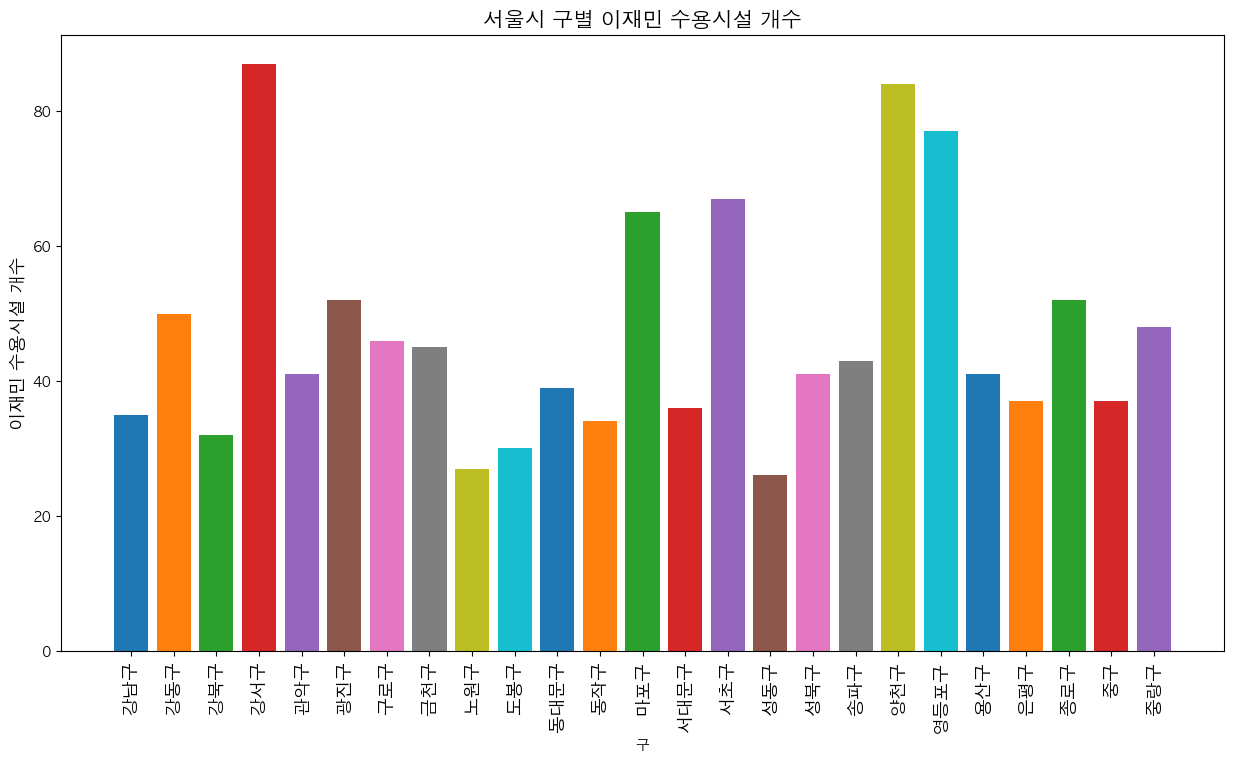

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# 파스텔 컬러 리스트
pastel_colors = mcolors.TABLEAU_COLORS.values()

# 막대 그래프 그리기
plt.figure(figsize=(15, 8))
plt.bar(df_count['시군구명'], df_count['수용시설개수'], color=list(pastel_colors)[:25])
plt.xticks(rotation=90,fontsize=13)
plt.title('서울시 구별 이재민 수용시설 개수',fontsize=15)
plt.xlabel('구')
plt.ylabel('이재민 수용시설 개수',fontsize=13)
plt.show()



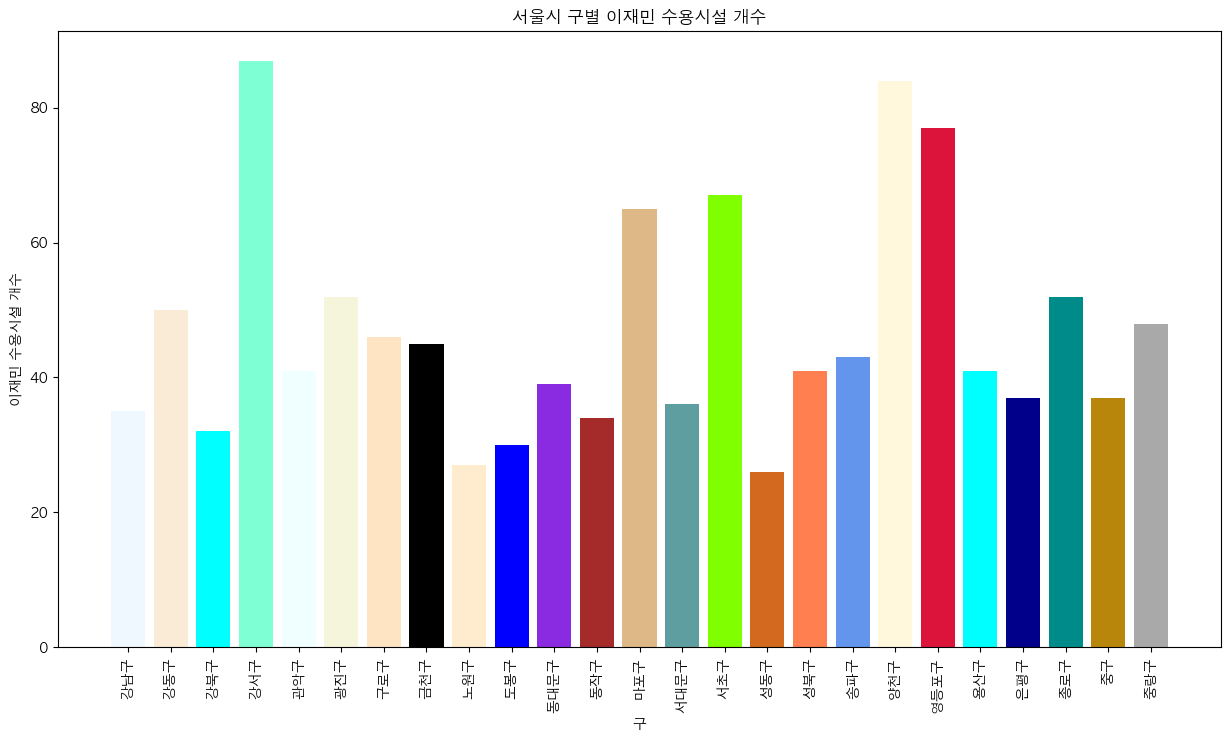

In [82]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# CSS4 색상 리스트
css4_colors = mcolors.CSS4_COLORS

# 막대 그래프 그리기
plt.figure(figsize=(15, 8))
plt.bar(df_count['시군구명'], df_count['수용시설개수'], color=list(css4_colors.values())[:25])
plt.xticks(rotation=90)
plt.title('서울시 구별 이재민 수용시설 개수')
plt.xlabel('구')
plt.ylabel('이재민 수용시설 개수')
plt.show()


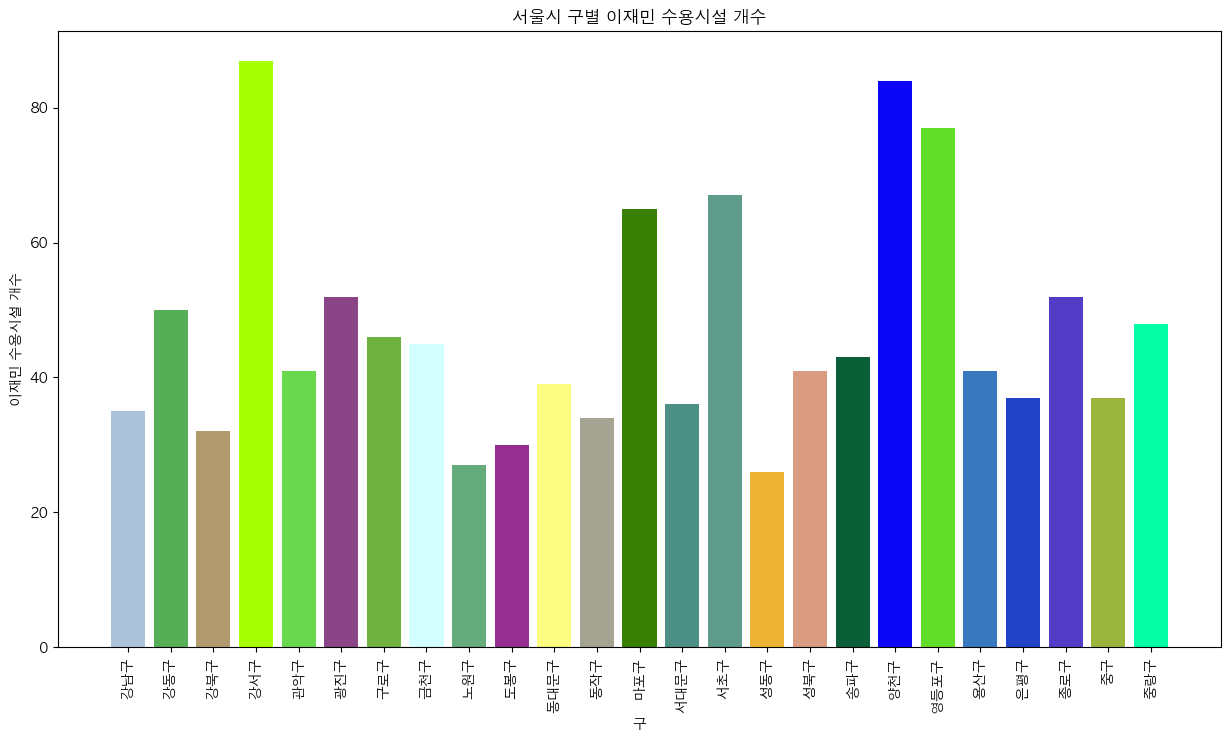

In [83]:
# XKCD 색상 리스트
xkcd_colors = mcolors.XKCD_COLORS

# 막대 그래프 그리기
plt.figure(figsize=(15, 8))
plt.bar(df_count['시군구명'], df_count['수용시설개수'], color=[xkcd_colors[x] for x in xkcd_colors][:25])
plt.xticks(rotation=90)
plt.title('서울시 구별 이재민 수용시설 개수')
plt.xlabel('구')
plt.ylabel('이재민 수용시설 개수')
plt.show()


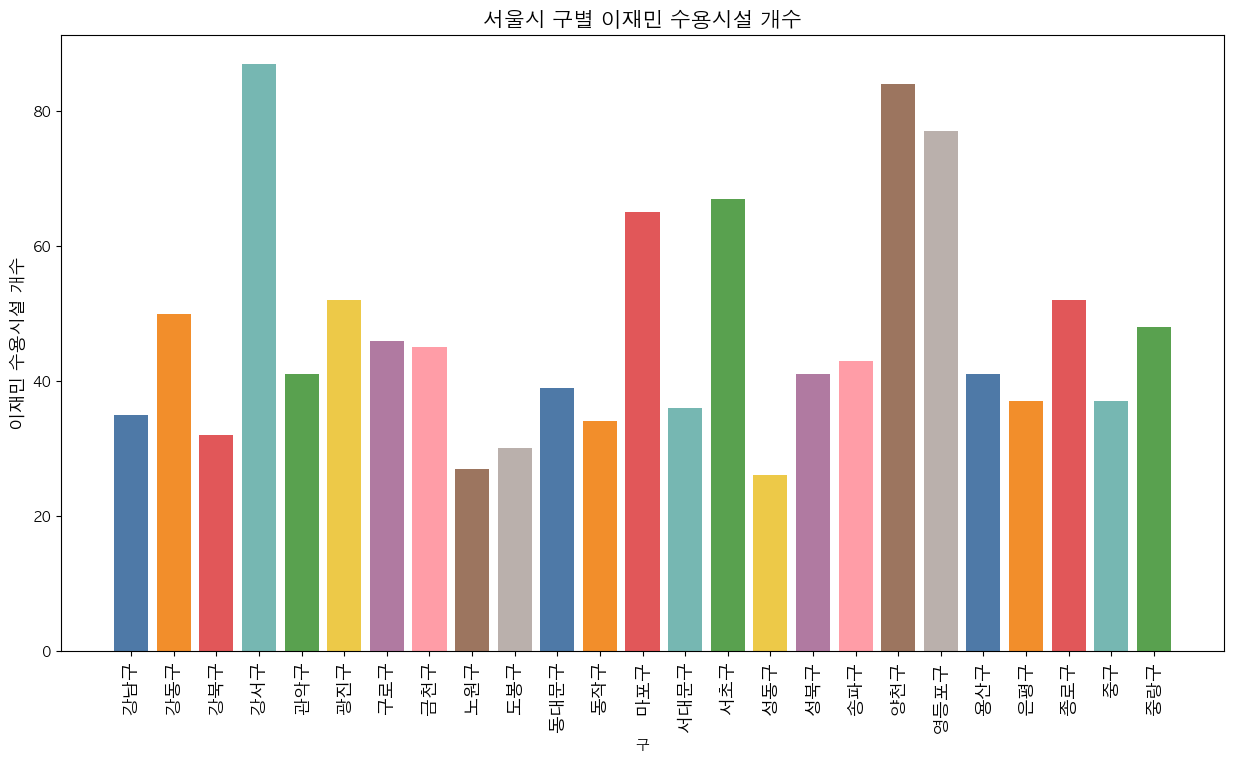

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Tableau 색상 팔레트 리스트
tableau_palette = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F', '#EDC948', '#B07AA1', '#FF9DA7', '#9C755F', '#BAB0AC']

# 막대 그래프 그리기
plt.figure(figsize=(15, 8))
plt.bar(df_count['시군구명'], df_count['수용시설개수'], color=tableau_palette[:25])
plt.xticks(rotation=90,fontsize=13)
plt.title('서울시 구별 이재민 수용시설 개수',fontsize=15)
plt.xlabel('구')
plt.ylabel('이재민 수용시설 개수',fontsize=13)
plt.show()


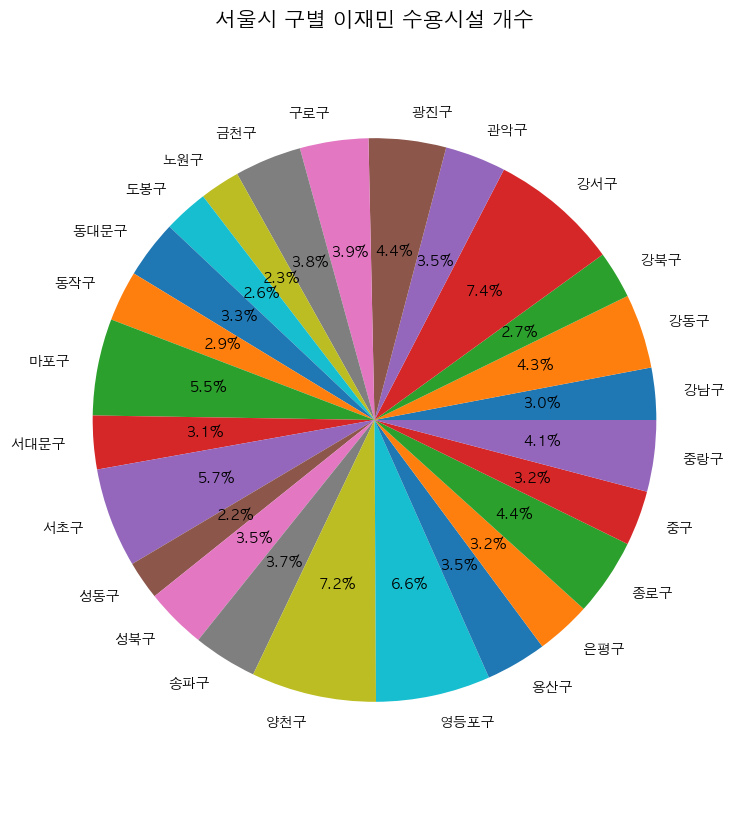

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# 파스텔 컬러 리스트
pastel_colors = mcolors.TABLEAU_COLORS.values()

# 파이 차트 그리기
plt.figure(figsize=(8, 10))
plt.pie(df_count['수용시설개수'], labels=df_count['시군구명'], colors=list(pastel_colors)[:25], autopct='%.1f%%')
plt.title('서울시 구별 이재민 수용시설 개수', fontsize=15)
plt.axis('equal')
plt.show()
